# Tests

## 1. Iterations tests

Let's consider task of minimization for convex quadratic form on fixed square when there is global solution in this square.

<IPython.core.display.Javascript object>


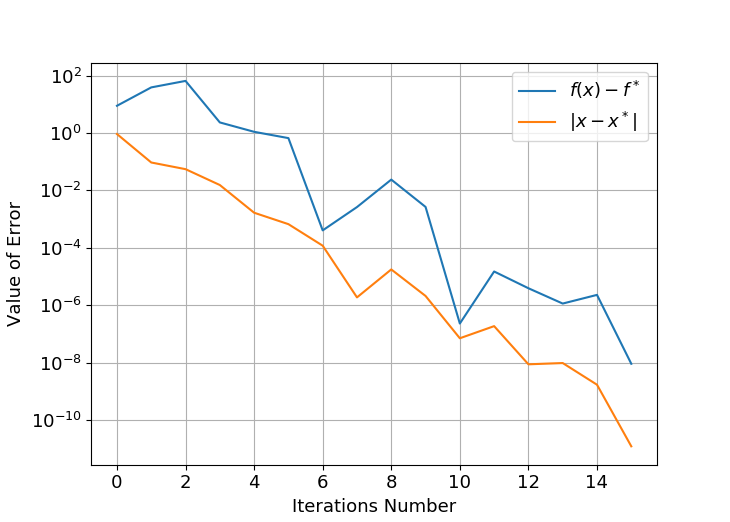

Theoretical Iteration Number through function constant 39.0
Theoretical Iteration Number through gradient constant 19.0


In [2]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import comparison
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
res = comparison.qf_test(1e-8)

Now we consider task of minimization for convex quadratic form on fixed square when there is not global solution in this square.

<IPython.core.display.Javascript object>


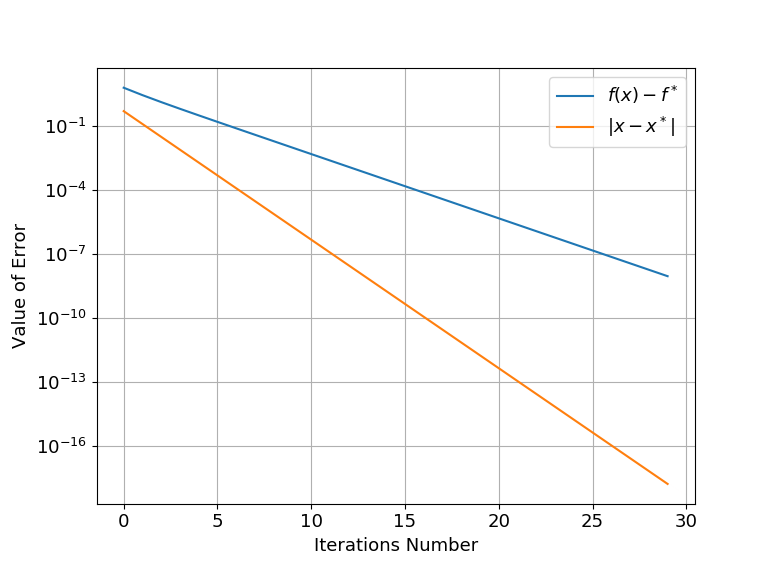

Theoretical Iteration Number through function constant 30.0
Theoretical Iteration Number through gradient constant 14.0


In [2]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import comparison
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
res = comparison.qf_test_2(1e-8)

## 2. Estimates for accuracy of solution on segment

There are three strategies for to stop search of solution on segment. Below $\delta$ is a distance between current point-approximation and accurate solution.

* **The first strategy** - Little big
$$\delta \leq \frac{M_{der}}{L},$$

where $L$ is a Lipschitz constant for *gradient*, $M_{der}$ is a lower bound of derivative with the respect to $y$ for parallel to axis $Ox$ segment and derivative with the respect to $x$ for parallel to axis $Oy$ segment in point solution on segment. For this strategy an estimate is computed on each new segment. This strategy is workable (see theorem 4.1 in [Description of method](https://github.com/ASEDOS999/Optimization-Halving-The-Square/blob/master/One%20method.pdf))

* **The second strategy** - Constant estimate for all segments

$$\delta \leq \frac{\epsilon}{2La\sqrt{5}\log_2\frac{2Ma\sqrt{2}}{\epsilon}},$$

where $L$ and $M$ are Lipschitz constant for *gradient* and *function*, $a$ is a size of square, $\epsilon$ is a required accuracy of initial task's solution. This strategy requires to compute the estimate one time for the one start method. There is proof for this istimate in theorem 1 in [Article of Pasechnyuk and Stonyakin](https://arxiv.org/pdf/1812.10300.pdf).

* **The third strategy** - Comparison with gradient in current point

$$\delta \leq \frac{|f'(\textbf{x}_{cur})|}{L},$$

where $\textbf{x}_{cur}$ is current point-approximation, $L$ is a Lipschitz constant for *gradient*. The $f'(\textbf{x}_{cur})$ is a derivative with the respect to $x$ for parallel to axis $Oy$ segment and is a derivative with the respect to $y$ for parallel to axis $Ox$.

**Important remark**: in the halving square method we use golden search selection as method that solve one-dimensional task.

In [11]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import estimates
%matplotlib notebook

epsilon = [0.1**(i) for i in range(7)]
d = estimates.get_tests_estimates(epsilon)

eps =  1.0e+00
Mean time (True gradient) = 0.71ms
Mean time (Constant estimate) = 1.42ms
Mean time (Current gradient) = 0.74ms
eps =  1.0e-01
Mean time (True gradient) = 1.10ms
Mean time (Constant estimate) = 2.57ms
Mean time (Current gradient) = 1.16ms
eps =  1.0e-02
Mean time (True gradient) = 1.71ms
Mean time (Constant estimate) = 4.53ms
Mean time (Current gradient) = 1.84ms
eps =  1.0e-03
Mean time (True gradient) = 2.43ms
Mean time (Constant estimate) = 7.18ms
Mean time (Current gradient) = 2.63ms
eps =  1.0e-04
Mean time (True gradient) = 3.12ms
Mean time (Constant estimate) = 10.12ms
Mean time (Current gradient) = 3.36ms
eps =  1.0e-05
Mean time (True gradient) = 3.78ms
Mean time (Constant estimate) = 13.57ms
Mean time (Current gradient) = 4.12ms
eps =  1.0e-06
Mean time (True gradient) = 4.94ms
Mean time (Constant estimate) = 19.16ms
Mean time (Current gradient) = 5.37ms


<IPython.core.display.Javascript object>


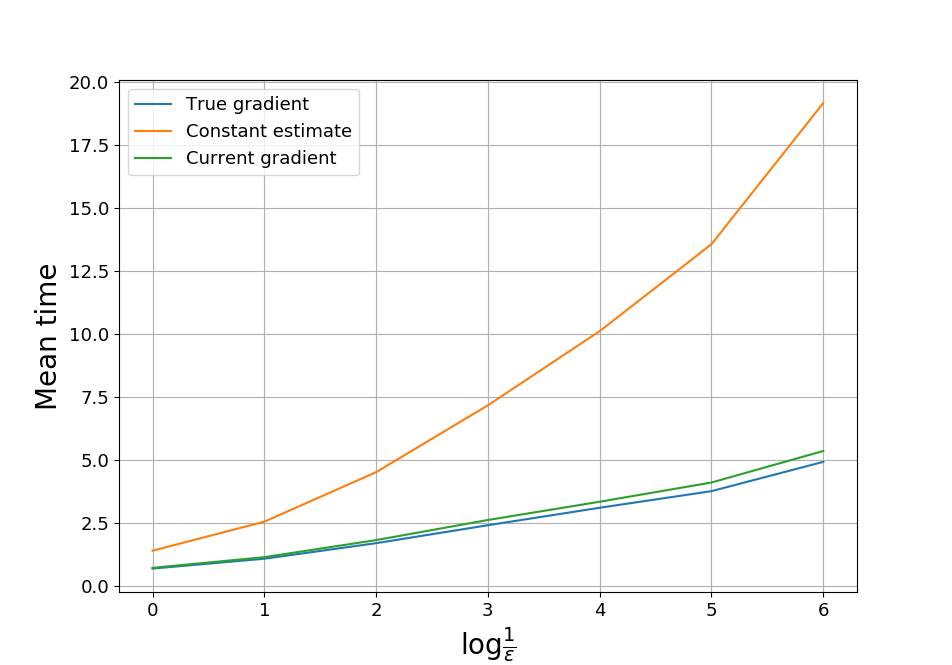

In [16]:
import matplotlib.pyplot as plt
%matplotlib notebook
cur = dict()
keys = list(d.keys())
keys.sort()
for i in keys:
    for j in d[i]:
        if cur.__contains__(j):
            cur[j].append(d[i][j])
        else:
            cur[j] = [d[i][j]]
k = cur.keys()
import numpy as np
keys = [-np.log(i)/np.log(10) for i in keys]
for j in k:
    plt.plot(keys, cur[j])
plt.grid()
n = 13
plt.xticks(fontsize = n)
plt.yticks(fontsize = n)
plt.legend(k, fontsize = n)
n = 20
plt.xlabel(r'$\log\frac{1}{\epsilon}$', fontsize = n)
plt.ylabel('Mean time', fontsize = n)
plt.savefig('1.pdf')

## 3. Comparison for LogSumExp N = 10

In [1]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import comparison
%matplotlib notebook
import time

N = 10
time_max = 1000
s=time.time()
results, f = comparison.NEWcomparison_LogSumExp(N, time_max = time_max)
results_copy1 = results, f
time.time()-s

R0 218.9929347170073
L_f 855.6774530339552
Ellipsoids
CurGrad
ConstEst
GD


./Tests_functions/test_functions.py:201: RuntimeWarning: overflow encountered in exp
  grad = lambda x: a *np.exp(a*x - m(x)*np.ones(a.shape))/(1/np.exp(m(x))+np.exp(a*x-m(x)*np.ones(a.shape)).sum()) + 2*x*self.C
./Tests_functions/test_functions.py:212: RuntimeWarning: overflow encountered in exp
  grad = lambda x: ((a.T.dot(np.exp(a*x))).sum()/(1+np.exp(a.dot(x)).sum()) + 2*x*self.C)
./Tests_functions/test_functions.py:212: RuntimeWarning: invalid value encountered in double_scalars
  grad = lambda x: ((a.T.dot(np.exp(a*x))).sum()/(1+np.exp(a.dot(x)).sum()) + 2*x*self.C)


1580.0740213394165

In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys = list(results.keys())
#keys = ["HalvingSquare-Const", 'Ellipsoids']
new_dict = dict()
for key in keys:
    print(key, len(results[key][3]))
    times = [i - results[key][3][0] for i in results[key][3]]
    f_value = [f.calculate_function(i[0], i[1]) for i in results[key][2]]
    new_dict[key] = (times, f_value)

HalvingSquare-CurGrad 3
GD 10
HalvingSquare-ConstEst 3
Ellipsoids 7


<IPython.core.display.Javascript object>


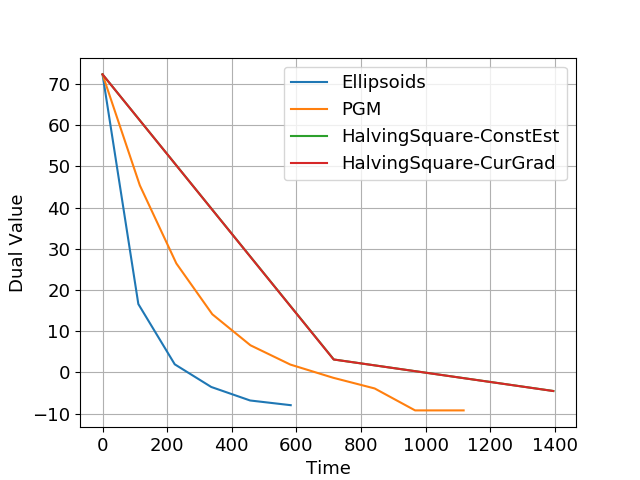

In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys.sort()
for i in keys:
    plt.plot(new_dict[i][0], new_dict[i][1])
keys[1] = 'PGM'
plt.grid()
n = 13
plt.xticks(fontsize = n)
plt.yticks(fontsize = n)
plt.legend(keys, fontsize = n)
n = 13
plt.ylabel('Dual Value', fontsize = n)
plt.xlabel('Time', fontsize = n)
plt.show()

## 4.  Comparison For LogSumExp N = 100

In [1]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import comparison
%matplotlib notebook

N = 100
time_max = 30
import time
s = time.time()
results, f = comparison.NEWcomparison_LogSumExp(N, time_max = time_max)
results_copy1 = results, f
time.time()-s

R0 3.0381311745351813
L_f 995.255739665203
Ellipsoids
CurGrad
ConstEst
GD


./Tests_functions/test_functions.py:201: RuntimeWarning: overflow encountered in exp
  grad = lambda x: a *np.exp(a*x - m(x)*np.ones(a.shape))/(1/np.exp(m(x))+np.exp(a*x-m(x)*np.ones(a.shape)).sum()) + 2*x*self.C


KeyboardInterrupt: 

In [5]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys = list(results.keys())
keys.sort()

#keys = ["HalvingSquare-Const", 'Ellipsoids']
new_dict = dict()
for key in keys:
    print(key, len(results[key][3]))
    times = [i - results[key][3][0] for i in results[key][3]]
    f_value = [f.calculate_function(i[0], i[1]) for i in results[key][2]]
    new_dict[key] = (times, f_value)

Ellipsoids 2
GD 2
HalvingSquare-ConstEst 2
HalvingSquare-CurGrad 2


<IPython.core.display.Javascript object>


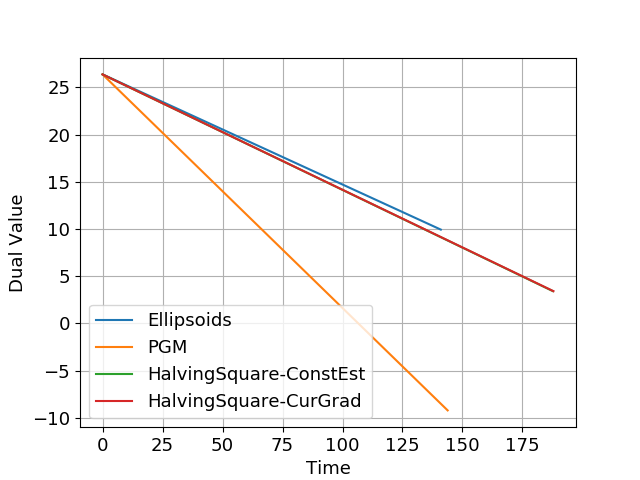

In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys.sort()
for i in keys:
    plt.plot(new_dict[i][0], new_dict[i][1])
keys[1] = 'PGM'

plt.grid()
n = 13
plt.xticks(fontsize = n)
plt.yticks(fontsize = n)
plt.legend(keys, fontsize = n)
plt.ylabel('Dual Value', fontsize = n)
plt.xlabel('Time', fontsize = n)
plt.show()

# HS Test

In [14]:
import sys
sys.path.append('Tests_functions')
from test_functions import LogSumExp
import numpy as np
a = np.random.uniform(-100, 100, (10,))
f = LogSumExp(a)
Q = f.get_square()
L, M = f.lipschitz_function(Q), f.lipschitz_gradient(Q)
lambda_ = (Q[0]+Q[1]) /10, (Q[2]+Q[3]) /10

R0 3.3911360159417883
L_f 101.65540346038796


In [15]:
from method_functions import get_grad
get_grad(f, lambda_, 0.00001)

0.7544853139204805 2.5585623215348874 0.5289223594331226 0.3492977709544788
0.7544853139204805 1.9303976963483627 0.7377439473749757 0.16639494423018272
0.7544853139204805 1.4564567119207668 0.7569593305975538 0.06341900496963447
0.7544853139204805 1.0988751995051305 0.6299289633212406 0.06948565072055232
0.7544853139204805 0.829085199858059 0.4375967242962804 0.09873956530982596
0.7544853139204805 0.6255326072817319 0.23770710180856947 0.11274458156803975
0.7544853139204805 0.4719551655724541 0.06171428052778544 0.11423570859065707
0.7544853139204805 0.35608324125332536 -0.07791739111235527 0.10773767624822306
0.7544853139204805 0.26865957605883733 -0.18076977443096173 0.09673642780397136
0.7544853139204805 0.20269970458049508 -0.25191680146742557 0.08380484223363413
0.7544853139204805 0.15293395024200349 -0.2838966636107131 0.06974516744271303
0.7544853139204805 0.11538641945743713 -0.31035810384226525 0.052788698739622775
0.7544853139204805 0.08705735890650469 -0.3151572947821718 0.

array([1.29231804, 0.94277804])

In [22]:
import numpy as np
A = np.random.uniform(-1, 1, (1000,1000))
A = A.T.dot(A)
l = list(np.linalg.eig(A)[0])
l.sort()
l

[3.0766614580476743e-05,
 0.0014850433727424922,
 0.0034644777641003564,
 0.006717160177132505,
 0.010492424639380868,
 0.0169026241967178,
 0.029985862803803106,
 0.04152163261577719,
 0.0598235533517778,
 0.07927112692345928,
 0.08566722506474875,
 0.08797811809095536,
 0.10777121919460124,
 0.1212686621733375,
 0.1287111544083145,
 0.1653901497809855,
 0.18774842389394109,
 0.19477785315989832,
 0.2428813098754976,
 0.2678874539223607,
 0.3357354315887975,
 0.37162687666784977,
 0.3758288114364635,
 0.4165424533976489,
 0.4556304312467096,
 0.5143140438876298,
 0.5639134393270522,
 0.6105556751131911,
 0.640629415810164,
 0.6762132995468808,
 0.7385820325430194,
 0.8142169077536477,
 0.848577109635483,
 0.880866154559693,
 0.890695581084463,
 1.0016620945531918,
 1.0827609919452579,
 1.103722469635096,
 1.145023680018249,
 1.2004763839192396,
 1.2792157858816213,
 1.361277859590069,
 1.4555352495785345,
 1.48464201625318,
 1.5238833144169512,
 1.625930619422367,
 1.6452353999156828,